##Test Images

In [ ]:
from google.colab import files
files.upload()

Saving ULTRACET.jpg to ULTRACET.jpg


{'ULTRACET.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\t\n\x08\n\x08\x0b\x0b\t\x0b\n\x0b\x0b\x0b\x0e\x10\x0c\n\x0b\r\x13\x17\x15\x10\x14\x0f\x16\x12\x12\x0e\x16\x12\x0f\x14\x0f\x0f\x14\x12\x14\x18\x13\x16\x14\x19 \x1a\x1e\x19\x18+!\x1c$\x13\x1c\x1d2"3*7%"0\x01\x06\x0b\n\x0b\r\x0e\x0b\x0c\x0c\x0e\x0e\x0c\r\x10\x0e\x1d\x14\r\x0c"\x14\x15\x17\x0e\x1e\x08\x17\x0c\x10\x16\x10\x11\x17\x0b\x10\x13\x14\x0b\x11\x19\x11\x1e\t\x19\x0c\x08"\x18\x1d\x14\x0f\x1d\x10\r\x0c\x0f\x16\x10\x0b\x14\x15#\x16\x18\xff\xc2\x00\x11\x08\x02\xa7\x02\xa7\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x06\x01\x07\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xfb\x88\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,555 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=2ea7bbd1c2a642caeaab936a28941a98604d0d018256eceea258eccef160603a
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [ ]:
!tesseract --version

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [ ]:
# text recognition
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
# configurations
config = ('-l eng --oem 3')

In [ ]:
def ocr(im):
  # read image
  image = cv2.imread(im)
  # pytessercat
  text = pytesseract.image_to_string(im, config=config)
  # print text 
  text = text.split('\n')
  cv2_imshow(image)
  return text

Pantocid

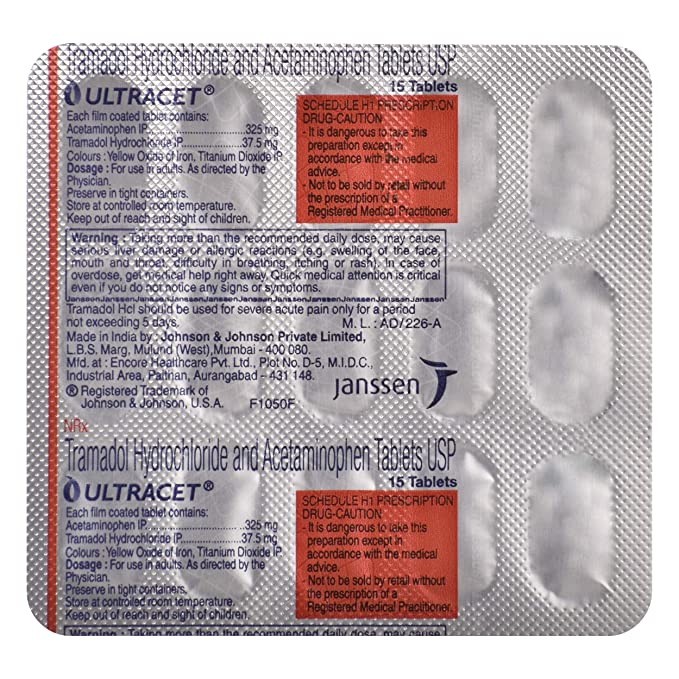

['cs a oF Aer',
 'Fmouth ang throes cifculty in béoetnacg. ch',
 'See rcanntera tern',
 '',
 ' ',
 '\x0c']

In [ ]:
ocr('/content/ULTRACET.jpg')

Azithral

In [ ]:
ocr('azithral.jpg')

Allegra

In [ ]:
ocr('allegra.jpg')

Thresholded image (Allegra)


In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
# gray = get_grayscale(image)
# thresh = thresholding(gray)
# opening = opening(gray)
# canny = canny(gray)

In [ ]:
ultracet = cv2.imread('/content/ULTRACET.jpg')

In [ ]:
thresh_ultracet = thresholding(get_grayscale(ultracet))

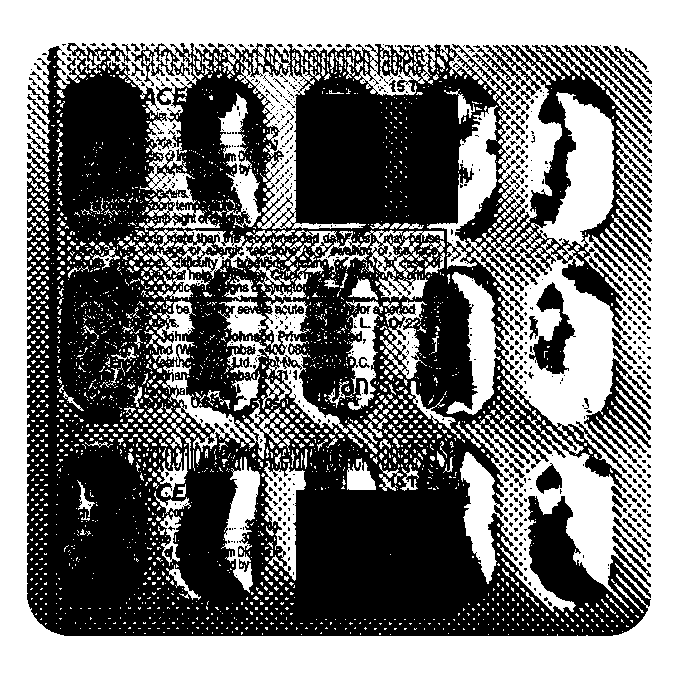

In [ ]:
cv2_imshow(thresh_ultracet)

In [ ]:
text = pytesseract.image_to_string(thresh_ultracet, config=config)
# print text 
text = text.split('\n')
text

[' ', '\x0c']

Thresholded image Azithral

In [ ]:
azithral = cv2.imread('azithral.jpg')

In [ ]:
thresh_azithral = thresholding(get_grayscale(azithral))

In [ ]:
cv2_imshow(thresh_azithral)

In [ ]:
text = pytesseract.image_to_string(thresh_azithral, config=config)
# print text 
text = text.split('\n')
text

##Real Images

Becadexamin

In [ ]:
ocr('becadexamin.jpg')

COF-Q

In [ ]:
ocr('cofq.jpg')

Crocin

In [ ]:
ocr('crocin.jpg')

Flexon

In [ ]:
ocr('flexon.jpg')

MOX 250

In [ ]:
ocr('mox250.jpg')

Shelcal

In [ ]:
ocr('shelcal.jpg')